In [2]:
!pip install pennylane

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 49.3/49.3 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 49.9/49.9 kB 861.1 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 3.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import cmath
import matplotlib.pyplot as plt

# QAOA Implementation

In [89]:
H_cost = qml.PauliZ(0) + qml.PauliZ(1) + qml.PauliZ(2) + qml.PauliZ(3) + qml.PauliZ(4) + qml.PauliZ(5) + qml.PauliZ(6) + qml.PauliZ(7) + qml.PauliZ(8) + qml.PauliZ(9)

H_mix = qml.PauliX(0) + qml.PauliX(1) + qml.PauliX(2) + qml.PauliX(3) + qml.PauliX(4) + qml.PauliX(5) + qml.PauliX(6) + qml.PauliX(7) + qml.PauliX(8) + qml.PauliX(9)

wires = [0,1,2,3,4,5,6,7,8,9]
num_layers = 5

In [90]:
def qaoa_layer(gamma,alpha):
    qaoa.cost_layer(gamma,H_cost)
    qaoa.mixer_layer(alpha,H_mix)

def circut(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer,num_layers,params[0],params[1])

dev = qml.device("default.qubit",wires = wires)

In [91]:
@qml.qnode(dev)
def cost_function(params):
    circut(params)
    return qml.expval(H_cost)

In [92]:
@qml.qnode(dev)
def circuit_state(params):
    circut(params)
    return qml.state()
def printState(params):
    return np.round(circuit_state(params),decimals = 5)

In [102]:
def real(state):
    bits = []
    for i in state:
        bits.append(np.real(i))
    return bits[900:]

In [109]:
opt = qml.GradientDescentOptimizer()
steps = 10
params = np.array([[0.5]*num_layers , [0.5]*num_layers],requires_grad = True)
snapshot = []
for i in range(steps):
    params = opt.step(cost_function,params)
    if (i-1)%(steps//10) ==0 or i == steps:
        state = printState(params)
        snapshot.append(real(state))

[[tensor(0.00099, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.00099, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.02442, requires_grad=True), tensor(0.00099, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.02442, requires_grad=True), tensor(0.00292, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.02442, requires_grad=True), tensor(0.0085, requires_grad=True), tensor(0.02442, requires_grad=True), tensor(0.02442, requires_grad=True), tensor(0.

<Axes: >

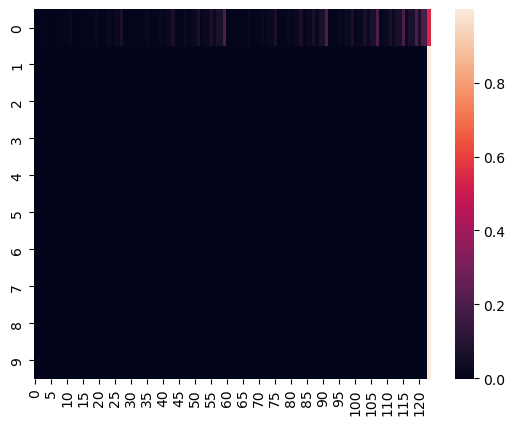

In [110]:
from seaborn import heatmap
print(snapshot)
heatmap(snapshot)